In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'c:\\Users\\parspc42540942\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [25]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [26]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)
model.save("handwritten.model")

Epoch 1/5
1875/1875 [==============================] - 12s 4ms/step - loss: 0.2610 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1070 - accuracy: 0.9667
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0713 - accuracy: 0.9773
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0542 - accuracy: 0.9826
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0403 - accuracy: 0.9864
INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


In [28]:
model = tf.keras.models.load_model('handwritten.model')

In [29]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.0922 - accuracy: 0.9738


In [30]:
loss

0.09224790334701538

In [31]:
accuracy

0.973800003528595

1/1 [==============================] - 0s 202ms/step
The number is probably 1


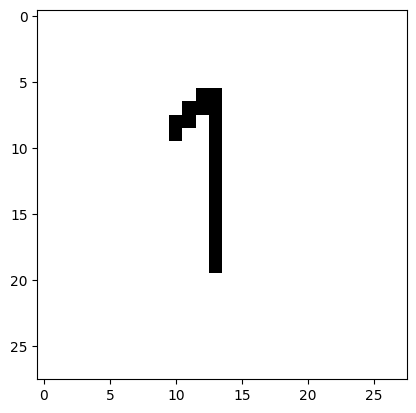

1/1 [==============================] - 0s 32ms/step
The number is probably 2


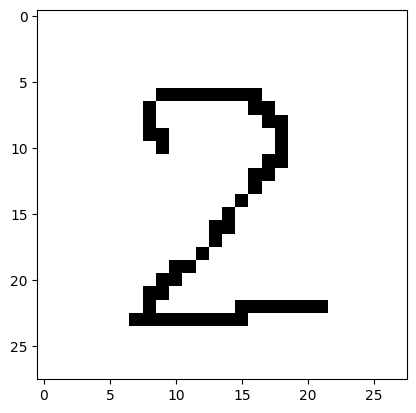

1/1 [==============================] - 0s 31ms/step
The number is probably 3


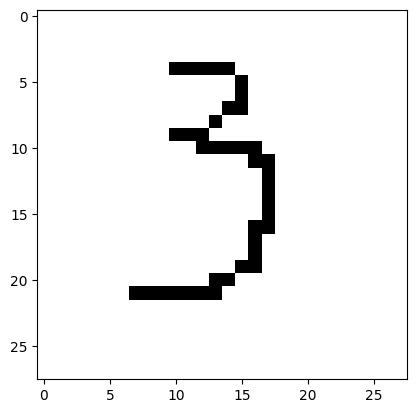

1/1 [==============================] - 0s 32ms/step
The number is probably 7


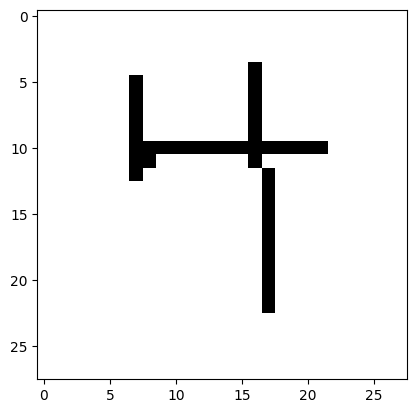

In [32]:
import os

image_number = 1
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_number}.png")[:, :, 0]
        img = np.invert(np.array([img]))
        
        model.reset_states()  # Reset the internal states of the model
        
        prediction = model.predict(img)
        print(f"The number is probably {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error")
    finally:
        image_number += 1

1/1 [==============================] - 0s 153ms/step


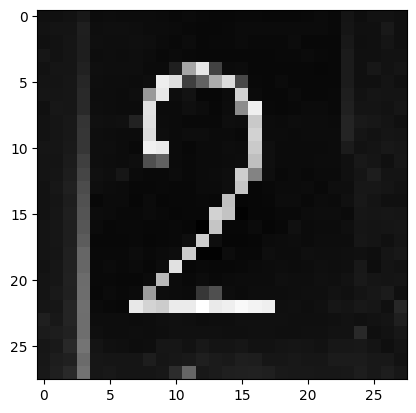

This number probably is a 8


In [33]:

image_path = 'number2.jpg'
img = cv2.imread(image_path)

img_resized = cv2.resize(img, (28, 28))

img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

img_inverted = np.invert(img_gray)

img_processed = img_inverted.reshape(1, 28, 28) / 255.0

prediction = model.predict(img_processed)

plt.imshow(img_gray, cmap=plt.cm.binary)
plt.show()

print(f"This number probably is a {np.argmax(prediction)}")